<a href="https://colab.research.google.com/github/Wisteriaa9/Plagiarism-Detector/blob/main/Plagiarism_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1 for text
2 for image
 
Enter your value:
2


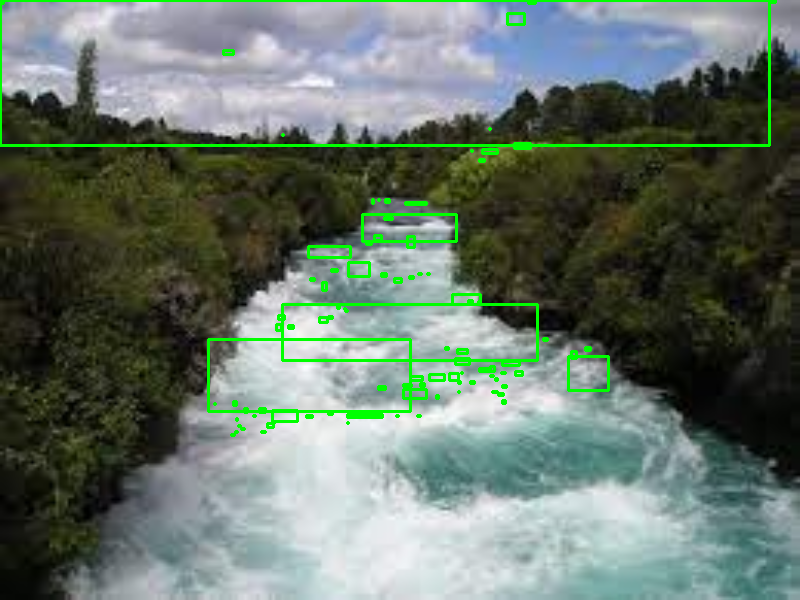

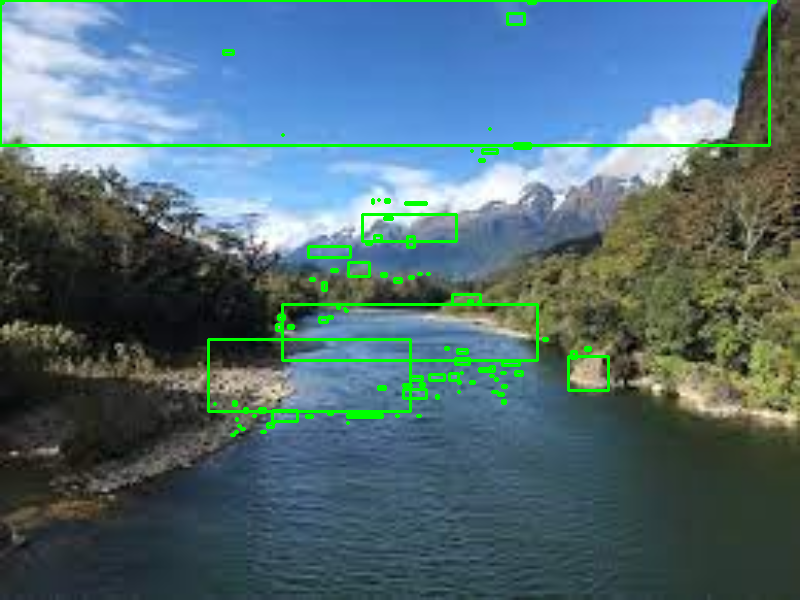

The images are not plagiarized.


In [13]:
import cv2
import math
from google.colab.patches import cv2_imshow
print("1 for text\n2 for image\n ");
val = int(input("Enter your value:\n"));
if val == 1 :
    # Define a function to tokenize text and count word frequencies
    def tokenize(text):
        words = text.lower().split()
        word_count = {}
        for word in words:
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1
        return word_count

    # Define a function to calculate the dot product of two vectors
    def dot_product(vector1, vector2):
        dot_product = 0
        for key in vector1:
            if key in vector2:
                dot_product += vector1[key] * vector2[key]
        return dot_product

    # Define a function to calculate the cosine similarity of two texts
    def cosine_similarity(text1, text2):
        vector1 = tokenize(text1)
        vector2 = tokenize(text2)
        dot = dot_product(vector1, vector2)
        magnitude1 = math.sqrt(dot_product(vector1, vector1))
        magnitude2 = math.sqrt(dot_product(vector2, vector2))
        if magnitude1 == 0 or magnitude2 == 0:
            return 0
        else:
            return dot / (magnitude1 * magnitude2)

    # Define a function to compare two texts and output the percentage of plagiarism
    def compare_texts(text1, text2):
        similarity = cosine_similarity(text1, text2)
        return similarity * 100

    # Define two texts to compare
    with open('/content/text1.txt', 'r') as file1:
        text1 = file1.read()
    with open('/content/text2.txt', 'r') as file2:
        text2 = file2.read()

    # Compare the two texts and output the percentage of plagiarism
    plagiarism_percentage = compare_texts(text1, text2)
    print(f"The percentage of plagiarism between text1 and text2 is: {plagiarism_percentage:.2f}%\n")
  
    def read_until_fullstop(file_obj):
        #Reads a line from the file until it encounters a full stop.
        line = ""
        while True:
            char = file_obj.read(1)
            if not char:
                return line
            line += char
            if char == ".":  # check for period
                next_char = file_obj.read(1)
                if next_char == " ":  # check for space after period
                    return line
        return line


    # Open files in read mode
    with open('/content/text1.txt', 'r') as file1, open('/content/text2.txt', 'r') as file2:

        # Read the lines from the files
        file1_lines = []
        file2_lines = []

        while True:
            line = read_until_fullstop(file1)
            if not line:
                break
            file1_lines.append(line.strip())

        while True:
            line = read_until_fullstop(file2)
            if not line:
                break
            file2_lines.append(line.strip())

        # Find similar lines
        similar_lines = set(file1_lines).intersection(file2_lines)
    with open('/content/text1.txt', 'r') as file1, open('/content/text2.txt', 'r') as file2:
        # Print the output
        print(f"file1\n")
        content = file1.read()
        print(content + "\n")
        print(f"file2\n")
        content = file2.read()
        print(content + "\n")
        if similar_lines:
            print(f"{len(similar_lines)} similar lines found:\n")
            for line in similar_lines:
                print(line)
        else:
            print("No similar lines found.")
else:
    # Load the images
    img1 = cv2.imread('/content/river1.jpg')
    img2 = cv2.imread('/content/river2.jpg')

    # Resize the images to the same dimensions
    img1 = cv2.resize(img1, (800, 600))
    img2 = cv2.resize(img2, (800, 600))

    # Convert the images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Apply a threshold to convert the images to binary
    _, thresh1 = cv2.threshold(gray1, 127, 255, cv2.THRESH_BINARY)
    _, thresh2 = cv2.threshold(gray2, 127, 255, cv2.THRESH_BINARY)
    # Find the common area between the two binary images
    common = cv2.bitwise_and(thresh1, thresh2)

    # Highlight the common area in the original images
    contours, _ = cv2.findContours(common, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours:
        (x, y, w, h) = cv2.boundingRect(contour)
        cv2.rectangle(img1, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)

    # Display the images with the common area highlighted
    from google.colab.patches import cv2_imshow
    cv2_imshow( img1)
    cv2_imshow( img2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    mse = ((gray1 - gray2) ** 2).mean()

    # Set a threshold for the MSE score
    threshold = 50

    # If the MSE score is below the threshold, consider the images to be plagiarized
    if mse < threshold:
        print("The images are plagiarized.")
    else:
        print("The images are not plagiarized.")